# Benchmarking Fashion-MNIST with ANN
**Md Fazlay Rabbi Masum Billah (masum@virginia.edu)**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. In this work, we try to benchmarking the Fashion-MNIST using ANNs. Here's how the data looks like:

![Here's an example how the data looks (each class takes three-rows):](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)


##  PRE-PROCESSING THE DATA

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Number of train images and shape (60000, 28, 28)
Number of train image labels 60000
Number of train images and shape (10000, 28, 28)
Number of train image labels 10000


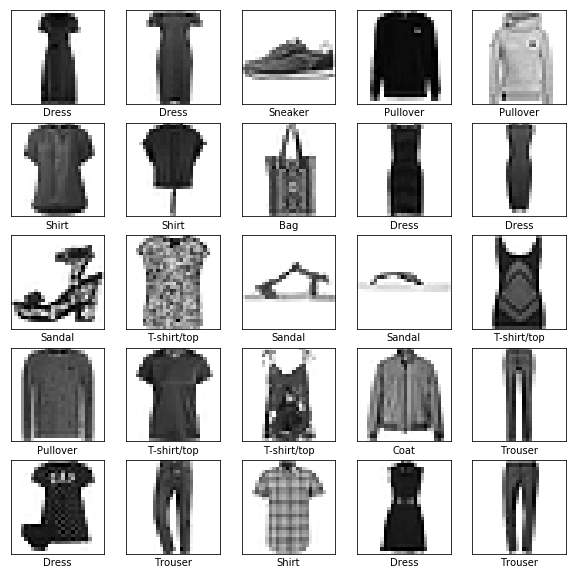

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Number of train images and shape "+str(train_images.shape))
print("Number of train image labels "+str(len(train_labels)))
print("Number of train images and shape "+str(test_images.shape))
print("Number of train image labels "+str(len(test_labels)))

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(50,75):
    plt.subplot(5,5,i+1-50)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

- - -
## CONSTRUCTION

Defined three networks with different structures as the best structure often is found through a process of trial and error experimentation:
- Tried different activation functions to see if they affect the performance.
- Used various optimizers to tweak the model parameters to minimize the cost function.

In [9]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.leaky_relu),
    keras.layers.Dense(64, activation=tf.nn.leaky_relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


- - -
## EXECUTION


In [10]:
from tensorflow.keras.models import model_from_json
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import itertools

def save_model(model, modelName):
    model_json = model.to_json()
    
    with open(modelName+".json", "w") as json_file:
        json_file.write(model_json)

    model.save_weights("model.h5")
    print("Saved "+ modelName+" to disk")
    
def load_model(modelName):
    json_file = open(modelName+".json", 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded "+ modelName+" from disk")
    return loaded_model

save_model(model1, "model1")
save_model(model1, "model2")
save_model(model1, "model3")


Saved model1 to disk
Saved model2 to disk
Saved model3 to disk


Loaded model1 from disk
Epoch 1/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5166 - acc: 0.8188
Epoch 2/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3820 - acc: 0.8618
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.3495 - acc: 0.8727
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3267 - acc: 0.8799
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.3100 - acc: 0.8860
Epoch 6/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2947 - acc: 0.8912
Epoch 7/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2865 - acc: 0.8938
Epoch 8/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2755 - acc: 0.8975
Epoch 9/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2675 - acc: 0.9000
Epoch 10/10
10000/10000 [==============================] - 0s 22us/step


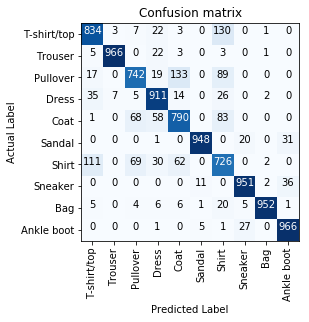

Loaded model2 from disk
Epoch 1/10
60000/60000 [==============================] - 3s 54us/step - loss: 0.5213 - acc: 0.8179
Epoch 2/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.3931 - acc: 0.8584
Epoch 3/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.3569 - acc: 0.8695
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3301 - acc: 0.8786
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.3138 - acc: 0.8839
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3011 - acc: 0.8891
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.2885 - acc: 0.8928
Epoch 8/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.2791 - acc: 0.8951
Epoch 9/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2690 - acc: 0.8983
Epoch 10/10
10000/10000 [==============================] - 0s 47us/step


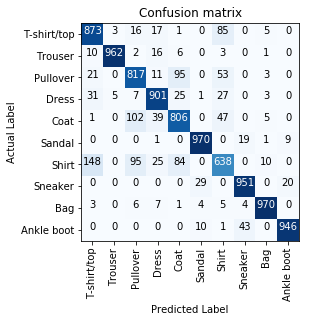

Loaded model3 from disk
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.5182 - acc: 0.8175
Epoch 2/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.3855 - acc: 0.8613
Epoch 3/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3485 - acc: 0.8741
Epoch 4/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3261 - acc: 0.8821
Epoch 5/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.3079 - acc: 0.8860
Epoch 6/10
60000/60000 [==============================] - 2s 33us/step - loss: 0.2945 - acc: 0.8917
Epoch 7/10
60000/60000 [==============================] - 2s 31us/step - loss: 0.2830 - acc: 0.8956
Epoch 8/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.2725 - acc: 0.8999
Epoch 9/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.2634 - acc: 0.9023
Epoch 10/10
10000/10000 [==============================] - 0s 27us/step


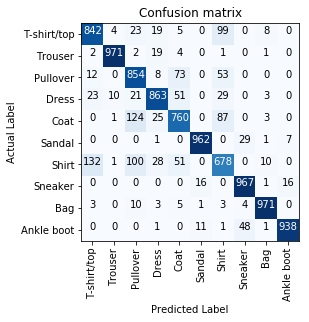

In [17]:
def plot_confusion_matrix(cm,class_,title='Confusion matrix',cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

test_acc = np.empty(3)
cm = np.empty(3)
    
for i in range(3):
    model = load_model("model"+str(i+1))
    model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=10)
    test_loss, test_acc[i] = model.evaluate(test_images, test_labels)

    test_pred = model.predict_classes(test_images, verbose=0)
    cm = confusion_matrix(test_labels, test_pred)
    plot_confusion_matrix(cm, class_names)

In [18]:
for i in range(3):
    print('Accuracy Model ',i+1, ': ', test_acc[i])

Accuracy Model  1 :  0.8786
Accuracy Model  2 :  0.8834
Accuracy Model  3 :  0.8806
